# 1D FDM - Axisymmetric Electrostatics
Often, we wish to study axisymmetric problems (i.e., problems with rotational symmetry around a center axis). This can of course be done in two or three dimensions by just modelling the entire object. However, it can be interesting to _reduce_ the dimension of the problem by making use of the symmetries: this reduces the required computation power and can yield better convergence properties.

In this notebook we will study electrostatics in an axisymmetric problem: the coaxial cable configuration. The relevant theory and differential equation will be derived, discretized using the finite-difference method, and implemented. Three examples with varying configurations are presented and explained.

# Theory
Below, the theory of 1D FDM electrostatics is derived in [cylindrical coordinates](https://en.wikipedia.org/wiki/Cylindrical_coordinate_system), starting from Maxwell's equations. The differential equations are derived and discretized using a finite-difference method. The boundary conditions required for this axisymmetric study are also derived.

### Electroquasistatics
Under quasi-static conditions, the coupling between the electric and magnetic field is neglected. For the electric field this leaves the following equations:
$$\left\{ \begin{array}{l}
    \nabla \times \mathbf{E} = 0 \implies \mathbf{E} = -\nabla V \\
    \nabla \cdot \mathbf{D} = \rho \\
    \mathbf{D} = \epsilon \mathbf{E}
\end{array} \right.$$
where $\mathbf{E}$ is the electric field strength in $\mathrm{[V/m]}$, $\mathbf{D}$ is the electric displacement field in $\mathrm{[C/m^2]}$, $V$ is the scalar electric potential in $\mathrm{[V]}$, and $\rho$ is the charge density in $\mathrm{[C/m^3]}$. The two fields are related by the permittivity, also called the dielectric constant, $\epsilon$ with units of $\mathrm{[F/m]}$.

To solve for the electric potential $V$, we can then combine these equations into a single second-order differential equation:
\begin{align*}
    \nabla \cdot \mathbf{D} & = \rho \\
    \nabla \cdot \left[ \epsilon \mathbf{E} \right] & = \rho \\
    -\nabla \cdot \left[ \epsilon \nabla V \right] & = \rho
\end{align*}
If the permittivity $\epsilon$ is constant on the domain under consideration, it can be taken out of the divergence and we obtain the well-known Poisson equation for electrostatics:
$$ \nabla^2 V = -\frac{\rho}{\epsilon} $$

### Formulation in 1D Cylindrical Coordinates
Consider the geometry under investigation invariant in the $\phi$ and $z$ directions. Then the electrostatic equations given above can be written in terms of the radial distance $r$ only. The gradient and divergence in cylindrical coordinates are elaborated [here](https://en.wikipedia.org/wiki/Cylindrical_coordinate_system).

First, we find an expression for the electric field by expanding the gradient operator:
$$ \mathbf{E} = -\nabla V = -\frac{\partial V}{\partial r} \hat{\mathbf{r}} $$
where we apply the assumption that the derivatives in the $\phi$ and $z$ directions are zero because the geometry is invariant in $\phi$ and $z$. Next, taking the divergence of the electric field, we obtain
\begin{align*}
    \nabla \cdot \mathbf{D} & = \frac{1}{r} \frac{\partial}{\partial r} \left[ r \epsilon(r) E_r \right] \\
        & = -\frac{1}{r} \frac{\partial}{\partial r} \left[ r \epsilon(r) \frac{\partial V}{\partial r} \right] \\
        & = -\frac{\partial}{\partial r} \left[ \epsilon(r) \frac{\partial V}{\partial r}\right] - \frac{\epsilon(r)}{r} \frac{\partial V}{\partial r} = \rho(r)
\end{align*}
In more generalized terms, $u(r) = V(r)$ is the unknown electric potential, $f(r) = -\rho(r)$ is the source function representing the charge density, and $c(r) = \epsilon(r)$ is a generalized diffusion coefficient, encoding the material properties: dielectric constant.
$$\frac{\partial}{\partial r} \left[ c(r) \frac{\partial u}{\partial r}\right] + \frac{c(r)}{r} \frac{\partial u}{\partial r} = f(r)$$

### Finite Difference Approximation
Discretizing this differential equation using the finite difference approximation, we obtain
$$\frac{1}{h^2}\left[ c_{i-0.5} u_{i-1} - (c_{i+0.5} + c_{i-0.5}) u_i + c_{i+0.5} u_{i+1} \right] + \frac{1}{2 h r_i} \left[ c_i u_{i+1} - c_i u_{i-1}\right] = f_i$$
The factor $1/r$ in the second term has been a source of debate. The whole equation can be multiplied by $r$ to eliminate this factor. However, it could be left like this under the proposition that the term is never actually evaluated in $r_1 = 0$, because of the boundary condition.

Let $A = B^T B$ be the one-dimensional Poisson matrix, where $B$ and $B^T$ can be interpreted as single derivatives.
The matrix equation becomes
$$(r B^T D B + E C) \mathbf{u} = \mathbf{f}$$
where $D$ and $E$ are diagonal matrices describing the diffusion coefficient $c(r)$ on the midpoints and nodes respectively. Matrix $C$ also represents a single derivative, except that it is defined on the mesh nodes instead of the midpoints (elements). It is the _central difference approximation_ of the first derivative.

### Boundary Conditions
To simulate an axisymmetric configuration in 1D cylindrical FDM, a specific condition needs to be imposed on the symmetry boundary ($r = 0$). This condition can be derived from Maxwell's equations. In $r = 0$, the electric field must be zero because of the symmetry
$$ \mathbf{E} = -\nabla V \implies \nabla V(r = 0) = 0 \implies \left.\frac{\partial V}{\partial r}\right|_{r = 0} = 0 $$
A homogeneous Neumann condition (with $\alpha = 0$) must be imposed on the inner boundary. The condition on the outer boundary depends on the simulated problem. For electrostatics this is typically chosen to be the homogeneous Dirichlet condition $V(r = r_{outer}) = 0$.

### Post-processing
After obtaining the electric potential $V$, we can derive many other quantities of interest: the electric field $\mathbf{E} = (E_r, 0, 0)$, the displacement field $\mathbf{D} = (D_r, 0, 0)$, the electric energy density $W_e$, etc. Note that the field components in the $\phi$ and $z$ direction must be zero, because the potential is constant along those axes.
\begin{alignat*}{3}
    \mathbf{E} & = -\nabla V \quad && \implies E_r(r) = -\frac{d V(r)}{dr} \hat{\mathbf{r}} \\
    \mathbf{D} & = \epsilon \mathbf{E} \quad && \implies D_r(r) = \epsilon(r) E_r(r) \\
    W_e & = \frac{1}{2} \mathbf{D} \cdot \mathbf{E} \quad && \implies W_e(r) = \frac{1}{2} \epsilon(r) E_r^2(r)
\end{alignat*}

# Import packages

In [1]:
using LinearAlgebra
using Interpolations

using Plots
using LaTeXStrings

# Example 1: Coaxial Cylinders
Consider a configuration consisting of coaxial cylinders with a cross-section as shown in the figure. The inner cylinder has a voltage applied to it, and the outer cylinder is grounded. There is a dielectric material between the cylinders.

![Configuration for example 1](images/es_ex1_config.svg)

## Analytical Solution
The analytical solution in the case of a single dielectric material can easily be calculated from the Laplace equation.
$$\nabla^2 V = \frac{1}{r} \frac{\partial}{\partial r} \left[ r \frac{\partial V}{\partial r} \right] = 0 \implies V(r) = A \ln r + B$$
Applying the boundary conditions $V(r=a) = V_0$ and $V(r=b) = 0$, the analytical solutions to the electric potential and electric field are found:
\begin{align*}
    V(r)   & = \frac{V_0}{\ln a/b} \ln r/b \\
    E_r(r) & = \frac{1}{r} \frac{V_0}{\ln a/b}
\end{align*}
Apparently, when there is only one material, its dielectric constant has no effect on the field distribution. This is also what we would expect from Maxwell's equations. This can be verified numerically by changing the parameter $\epsilon_1$ in the code below and observing the potential and field strength distributions.

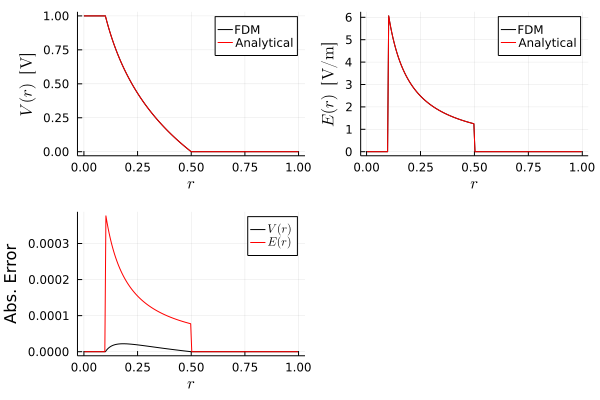

In [15]:
# Parameters
a = 0.1;  # Inner radius
b = 0.5;  # Outer radius

V0 = 1;   # Voltage of inner cylinder

eps0 = 8.85e-12;
eps1 = 2 * eps0;  # Permittivity of dielectric material

# Construct the 1D mesh
N = 200; Np1 = N+1; h = 1 / N; h2 = h*h; 
x = Vector(0 : h : 1); 
xmid = x[1:end-1] .+ h / 2; 

# Define source and material
f = zeros(Np1);

eps(x)  = eps1 .* ones(size(x));
D = eps(xmid);
E = eps(x);

# Construct A and B, and C matrices
#  A: Double derivative in x direction
#  B and BT: Single derivative in x direction (on xmid)
#  C: Single derivative in x direction (on x)
B = Float64[i==j ? (-1.)/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]
BT = Transpose(B)
C = 1/(2*h) * Tridiagonal(ones(N), zeros(N+1), -ones(N));

A = x .* BT * Diagonal(D) * B + Diagonal(E) * C;

# Boundary conditions
#  idxa and idxb are the indices corresponding to the values r = a and r = b
#  These indices are used to index A and f and impose the proper voltages there
idxa = trunc.(Int, a / h)+1;
idxb = trunc.(Int, b / h)+1;

A[1,1] = 1/h;        A[1,2] = -1/h;        f[1] = 0;    # dV/dr = 0: Axisymmetry
A[idxa,:] = zeros(Np1); A[idxa,idxa] = 1;           f[idxa] = V0;
A[idxb,:] = zeros(Np1); A[idxb,idxb] = 1;           f[idxb] = 0;
A[end,end-1] = 0;    A[end,end] = 1;       f[end] = 0;   # V = 0: Grounded outer cylinder

# Solve differential equation
u   = A \ f;
ux  = -B * u;

# Analytical solution (only valid for a > 0)
u_a = V0 * log.(x / b) ./ log(a / b) .* (x .> a) .* (x .< b) .+ V0 .* (x .<= a);
ux_a = V0 ./ (xmid * log(b / a))  .* (xmid .> a) .* (xmid .< b);

## Plot
# Voltage / electric potential
p1 = plot(x, u, color = :black, xlabel = L"r", ylabel = L"V(r)\ \ [\mathrm{V}]", label = "FDM");
p1 = plot!(x, u_a, color = :red, label = "Analytical")

# Electric field E
p2 = plot(xmid, abs.(ux), color = :black, xlabel = L"r", ylabel = L"E(r)\ \ [\mathrm{V/m}]", label = "FDM");
p2 = plot!(xmid, abs.(ux_a), color = :red, label = "Analytical")

# Error between FDM and analytical solutions for V and E
p3 = plot(x, abs.(u - u_a), color = :black, xlabel = L"r", ylabel = "Abs. Error", label = L"V(r)")
p3 = plot!(xmid, abs.(ux - ux_a), color = :red, label = L"E(r)")

plot(p1, p2, p3)

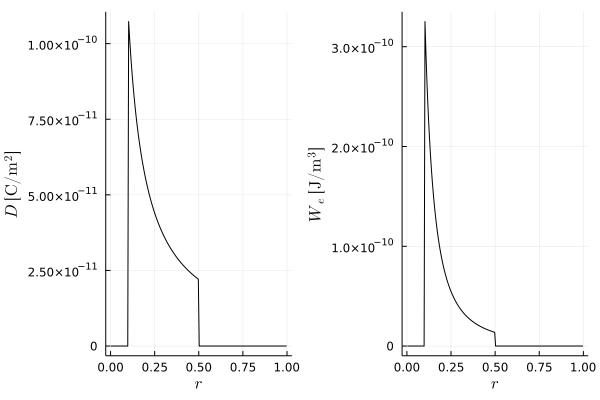

In [16]:
# Displacement field D
p1 = plot(xmid, D .* ux, color = :black, xlabel = L"r", ylabel = L"D\ [\mathrm{C/m^2}]", legend = false)

# Electric energy density
p2 = plot(xmid, 0.5 * D .* ux.^2, color = :black, xlabel = L"r", ylabel = L"W_e\ [\mathrm{J/m^3}]", legend = false)

plot(p1, p2)

# Example 2: Coaxial Cylinders II
Consider a configuration consisting of coaxial cylinders with a cross-section as shown in the figure. The inner cylinder has a voltage applied to it, and the outer cylinder is grounded. There are two dielectric materials with different dielectric constants between the cylinders.

![Configuration for example 2](images/es_ex2_config.svg)

## Analytical Solution
For a coaxial cylinder configuration with different material layers $k = 1, \dots, n$ with radii $r_k$, the electric field strength in the radial direction is
$$E_{r,k} = \frac{V_0}{r} \frac{1}{\frac{\epsilon_k}{\epsilon_1} \ln\frac{r_2}{r_1} + \frac{\epsilon_k}{\epsilon_2} \ln\frac{r_3}{r_2} + \dots}$$
In this case, the _ratio_ of the dielectric constants is important. Properly selecting materials can allow us to reduce the electric field strength in critical locations. This process is called _field grading_ and is illustrated in the example below. Observe that the peak field strength is lower than in example 1.

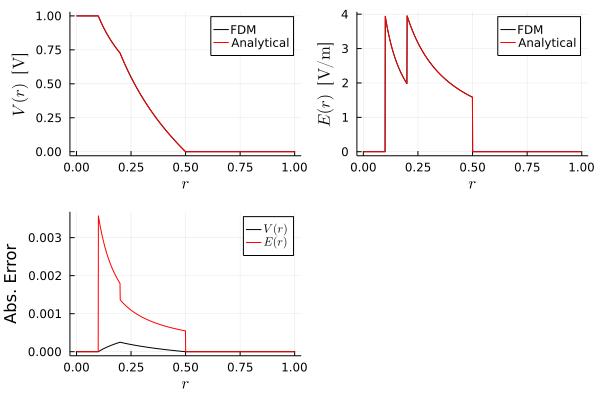

In [7]:
# Parameters
a = 0.1;  # Inner radius
c = 0.2;  # Radius of first material
b = 0.5;  # Outer radius

V0 = 1;   # Voltage of inner cylinder

eps0    = 8.85e-12;
eps_in  = 6 * eps0;  # Permittivity of inner material
eps_out = 3 * eps0;  # Permittivity of outer material

# Construct the 1D mesh
N = 1000; Np1 = N+1; h = 1 / N; h2 = h*h; 
x = Vector(0 : h : 1); 
xmid = x[1:end-1] .+ h / 2; 

# Define source and material
f = zeros(Np1);

eps(x)  = eps_in .* (x .< c) + eps_out .* (x .>= c);
D = eps(xmid);
E = eps(x);

# Construct A and B, and C matrices
#  A: Double derivative in x direction
#  B and BT: Single derivative in x direction (on xmid)
#  C: Single derivative in x direction (on x)
B = Float64[i==j ? (-1.)/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]
BT = Transpose(B)
C = 1/(2*h) * Tridiagonal(ones(N), zeros(N+1), -ones(N));

A = x .* BT * Diagonal(D) * B + Diagonal(E) * C;

# Boundary conditions
#  idxa and idxb are the indices corresponding to the values r = a and r = b
#  These indices are used to index A and f and impose the proper voltages there
idxa = trunc.(Int, a / h)+1;
idxb = trunc.(Int, b / h)+1;

A[1,1] = 1/h;             A[1,2] = -1/h;        f[1] = 0;     # dV/dr = 0: Axisymmetry
A[idxa,:] = zeros(Np1);   A[idxa,idxa] = 1;     f[idxa] = V0; # V = V0: Inner cylinder
A[idxb,:] = zeros(Np1);   A[idxb,idxb] = 1;     f[idxb] = 0;  # V = 0: Grounded outer cylinder
A[end,end-1] = 0;         A[end,end] = 1;       f[end] = 0;   # V = 0: Boundary of simulation domain

# Solve differential equation
u   = A \ f;
ux  = -B * u;

# Analytical solution (only valid for a > 0)
u_a = (V0 .- V0 * log.(x/a) ./ (log(c/a) + eps_in/eps_out * log(b/c)) .* (x .< c) .- (V0 * log.(c/a) ./ (log(c/a) + eps_in/eps_out * log(b/c)) .+ V0 * log.(x/c) ./ (eps_out/eps_in * log(c/a) + log(b/c))) .* (x .>= c)) .* (a .< x) .* (x .< b) + V0 .* (x .<= a);
ux_a = (V0 ./ xmid ./ (log(c/a) + eps_in/eps_out * log(b/c)) .* (xmid .< c) + V0 ./ xmid ./ (eps_out/eps_in * log(c/a) + log(b/c)) .* (xmid .>= c)) .* (a .< xmid) .* (xmid .< b);


p1 = plot(x, u, color = :black, xlabel = L"r", ylabel = L"V(r)\ \ [\mathrm{V}]", label = "FDM");
p1 = plot!(x, u_a, color = :red, label = "Analytical")

p2 = plot(xmid, abs.(ux), color = :black, xlabel = L"r", ylabel = L"E(r)\ \ [\mathrm{V/m}]", label = "FDM");
p2 = plot!(xmid, abs.(ux_a), color = :red, label = "Analytical")

p3 = plot(x, abs.(u - u_a), color = :black, xlabel = L"r", ylabel = "Abs. Error", label = L"V(r)")
p3 = plot!(xmid, abs.(ux - ux_a), color = :red, label = L"E(r)")

plot(p1, p2, p3)

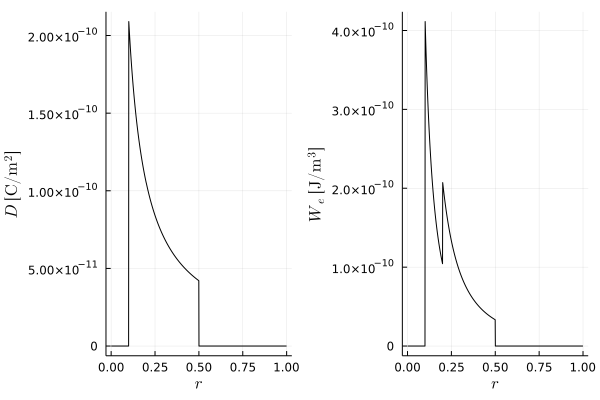

In [8]:
# Displacement field D
p1 = plot(xmid, D .* ux, color = :black, xlabel = L"r", ylabel = L"D\ [\mathrm{C/m^2}]", legend = false)

# Electric energy density
p2 = plot(xmid, 0.5 * D .* ux.^2, color = :black, xlabel = L"r", ylabel = L"W_e\ [\mathrm{J/m^3}]", legend = false)

plot(p1, p2)

# Example 3: Space Charge
By placing appropriate charge in space (i.e. at the location where the inner and outer radius are) the same graphs as above can be obtained. In this example, the configuration is identical to example 1.

![Configuration for example 3](images/es_ex1_config.svg)

The capacitance $C$ of the coaxial cylinder configuration with a single dielectric material and length $l$ (into the screen) is
$$ C = \frac{2\pi\epsilon l}{\ln b/a} $$
Then for an applied voltage of $V_0 = 1\,\mathrm{V}$, we need to place the following charges, where $\sigma(r)$ is the line charge density in $\mathrm{[C/m]}$.
\begin{align*}
    \sigma(r = a) & = 34.55\,\mathrm{pC/m} \\ 
    \sigma(r = b) & = -34.55\,\mathrm{pC/m} \\
\end{align*}
The line charge density $\sigma(r)$ is related to the space charge density $\rho(r)$. The charge $Q$ is
\begin{align*}
     Q & = \int_l \sigma dl = \sigma l \\
       & = \iiint_V \rho dV = 
\end{align*}

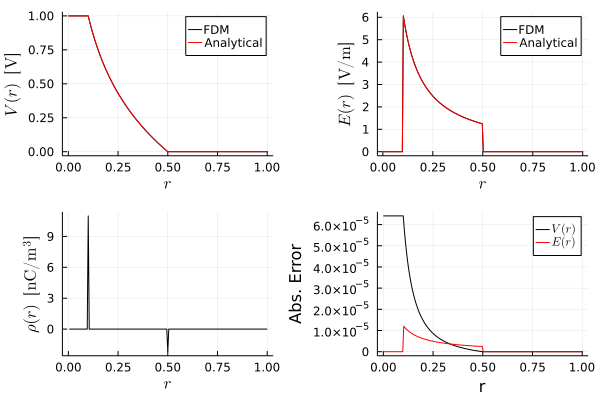

In [10]:
# Construct the 1D mesh
N = 200; Np1 = N+1; h = 1 / N; h2 = h*h; 
x = Vector(0 : h : 1); 
xmid = x[1:end-1] .+ h / 2; 

# Define source and material
f = 3.455e-11 * (x .> 0.099) .* (x .< 0.101) - 3.455e-11 * (x .> 0.499) .* (x .< 0.501);

f = f ./ (2*pi*x * h); # Convert C/m to C/m^3
f = f .* x; # Multiply by x to eliminate division in DE

eps0 = 8.85e-12;
D = eps0 * ones(N);
E = eps0 * ones(Np1);

# Construct A and B matrices
B = Float64[i==j ? (-1.)/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]
BT = Transpose(B)
C = 1/(2*h) * Tridiagonal(ones(N), zeros(N+1), -ones(N));

A = x .* BT * Diagonal(D) * B + Diagonal(E) * C;

# Boundary conditions
A[1,1] = 1/h;        A[1,2] = -1/h;        f[1] = 0;     # Axisymmetry
A[end,end-1] = 0;    A[end,end] = 1;       f[end] = 0;   # V = 0  

# Solve differential equation
u   = A \ f;
ux  = -B * u;

# Analytical solution (only valid for a > 0)
u_a = V0 * log.(x / b) ./ log(a / b) .* (x .> a) .* (x .< b) .+ V0 .* (x .<= a);
ux_a = V0 ./ (xmid * log(b / a))  .* (xmid .> a) .* (xmid .< b);

p1 = plot(x, u, color = :black, xlabel = L"r", ylabel = L"V(r)\ \ [\mathrm{V}]", label = "FDM");
p1 = plot!(x, u_a, color = :red, label = "Analytical")

p2 = plot(xmid, abs.(ux), color = :black, xlabel = L"r", ylabel = L"E(r)\ \ [\mathrm{V/m}]", label = "FDM");
p2 = plot!(xmid, abs.(ux_a), color = :red, label = "Analytical")

p3 = plot(x, f ./ x * 1e9, color = :black, xlabel = L"r", ylabel = L"\rho(r)\ \ [\mathrm{nC/m^3}]", legend = false);

p4 = plot(x, abs.(u - u_a), color = :black, xlabel = "r", ylabel = "Abs. Error", label = L"V(r)")
p4 = plot!(xmid, abs.(ux - ux_a), color = :red, label = L"E(r)")

plot(p1, p2, p3, p4)

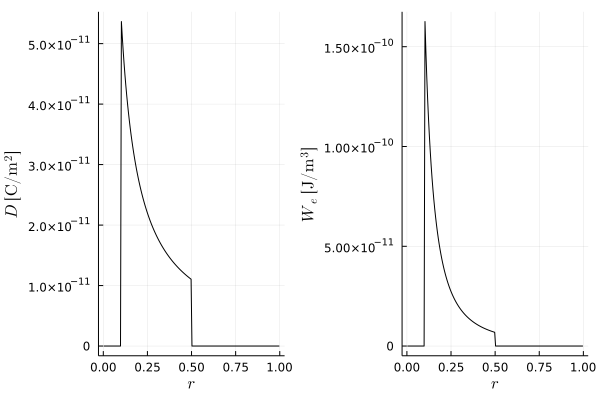

In [11]:
# Displacement field D
p1 = plot(xmid, D .* ux, color = :black, xlabel = L"r", ylabel = L"D\ [\mathrm{C/m^2}]", legend = false)

# Electric energy density
p2 = plot(xmid, 0.5 * D .* ux.^2, color = :black, xlabel = L"r", ylabel = L"W_e\ [\mathrm{J/m^3}]", legend = false)

plot(p1, p2)

Note that, although the distribution of the electric potential $V$ and electric field $E_r$ is identical to example 1, the displacement field $D_r$ and energy density $W_e$ are not. This is because the dielectric constant of the insulation material is different ($\epsilon_r = 2$ in example 1, and $\epsilon_r = 1$ in example 3).
The difference between the distributions is hence also a factor of $2$.